In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_context("poster")


In [2]:
mainfile = 'dados/dengue_popGT100K.gzip'
datadf = pd.read_parquet(mainfile)
datadf ## just to remember what the data looks like


,id_mn_resi,dt_notific,dengue_cases,pr_sum,Tmax_max,municipio,pop_21,slug_name,lon,lat,is_capital,mesoregion,microregion
0,110002,2011-01-09 00:00:00+00:00,2,2650.297119,219.078125,1100023,111148,ariquemes,-63.033269,-9.908463,False,1102,11003
1,110002,2011-01-16 00:00:00+00:00,2,1362.243164,216.531250,1100023,111148,ariquemes,-63.033269,-9.908463,False,1102,11003
2,110002,2011-01-23 00:00:00+00:00,1,4893.931641,203.640625,1100023,111148,ariquemes,-63.033269,-9.908463,False,1102,11003
3,110002,2011-01-30 00:00:00+00:00,2,4013.398682,209.093750,1100023,111148,ariquemes,-63.033269,-9.908463,False,1102,11003
4,110002,2011-02-06 00:00:00+00:00,3,2842.511475,215.578125,1100023,111148,ariquemes,-63.033269,-9.908463,False,1102,11003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161464,530010,2020-07-05 00:00:00+00:00,519,0.000000,197.062500,5300108,3094325,brasilia,-47.887905,-15.794087,True,5301,53001
161465,530010,2020-07-12 00:00:00+00:00,410,0.000000,198.031250,5300108,3094325,brasilia,-47.887905,-15.794087,True,5301,53001
161466,530010,2020-07-19 00:00:00+00:00,380,0.000000,193.593750,5300108,3094325,brasilia,-47.887905,-15.794087,True,5301,53001
161467,530010,2020-07-26 00:00:00+00:00,288,0.000000,193.046875,5300108,3094325,brasilia,-47.887905,-15.794087,True,5301,53001


In [15]:
df = pd.read_csv('results/result_horizon12_04052023_074914.csv', sep=',')
df.head()


,horizon,city,model,errorMetric,errorValue,modelTime
0,12,palmas,arimaSimple,nmse,3.099766e+01,0.79
1,12,palmas,arimaSimple,mape,4.976450e+14,0.79
2,12,palmas,local_LGBM,nmse,1.809230e+01,6.76
3,12,palmas,local_LGBM,mape,1.020212e+14,6.76
4,12,palmas,all_LGBM,nmse,2.205442e+01,105.18


In [16]:
len(df.city.unique())

3

In [17]:
df.model.unique()

array(['arimaSimple', 'local_LGBM', 'all_LGBM', 'meso_LGBM', 'micro_LGBM',
       'kshape6_LGBM', 'kshape17_LGBM'], dtype=object)

In [18]:
models = ['arimaSimple', 'local_LGBM', 'all_LGBM', 'meso_LGBM','micro_LGBM', 'kshape6_LGBM']
df = df[df['model'].isin(models)]

df

,horizon,city,model,errorMetric,errorValue,modelTime
0,12,palmas,arimaSimple,nmse,3.099766e+01,0.79
1,12,palmas,arimaSimple,mape,4.976450e+14,0.79
2,12,palmas,local_LGBM,nmse,1.809230e+01,6.76
3,12,palmas,local_LGBM,mape,1.020212e+14,6.76
4,12,palmas,all_LGBM,nmse,2.205442e+01,105.18
5,12,palmas,all_LGBM,mape,1.810620e+14,105.18
6,12,palmas,meso_LGBM,nmse,1.809230e+01,6.92
7,12,palmas,meso_LGBM,mape,1.020212e+14,6.92
8,12,palmas,micro_LGBM,nmse,1.809230e+01,4.93
9,12,palmas,micro_LGBM,mape,1.020212e+14,4.93


In [19]:
dfc = df[df['city']=='brasilia']
dfc = dfc[dfc['errorMetric']=='nmse'].sort_values('errorValue', ascending=False)
dfc


,horizon,city,model,errorMetric,errorValue,modelTime
28,12,brasilia,arimaSimple,nmse,12.504646,0.90
30,12,brasilia,local_LGBM,nmse,12.029202,6.65
34,12,brasilia,meso_LGBM,nmse,12.029202,5.53
36,12,brasilia,micro_LGBM,nmse,12.029202,7.17
32,12,brasilia,all_LGBM,nmse,10.860651,92.00
38,12,brasilia,kshape6_LGBM,nmse,8.819168,28.87


In [20]:
dfnmse = df[df['errorMetric']=='nmse']
min_error_df = dfnmse.groupby('city').apply(lambda x: x[x['errorValue'] == x['errorValue'].min()])

min_error_df

grouped_df = min_error_df.groupby('model').size().reset_index(name='count')

grouped_df = grouped_df.sort_values('count', ascending=False)

#sum(grouped_df['count'].values)
grouped_df


,model,count
0,kshape6_LGBM,2
1,meso_LGBM,1


In [21]:
dfnmse = df[df['errorMetric']=='nmse']
min_error_df = dfnmse.groupby('city').apply(lambda x: x[x['errorValue'] == x['errorValue'].min()])
grouped_df = min_error_df.groupby('model')['city'].apply(list)
print('Model and the cities that model achieves the lowest error')
grouped_df 

Model and the cities that model achieves the lowest error


model
kshape6_LGBM    [brasilia, palmas]
meso_LGBM         [rio-de-janeiro]
Name: city, dtype: object

In [22]:
grouped_df[1]

['rio-de-janeiro']

In [23]:
dfnmse = df[df['errorMetric']=='nmse']
max_error_df = dfnmse.groupby('city').apply(lambda x: x[x['errorValue'] == x['errorValue'].max()])

max_error_df

grouped_df = max_error_df.groupby('model').size().reset_index(name='count')

grouped_df = grouped_df.sort_values('count', ascending=False)

grouped_df

,model,count
0,arimaSimple,2
1,kshape6_LGBM,1


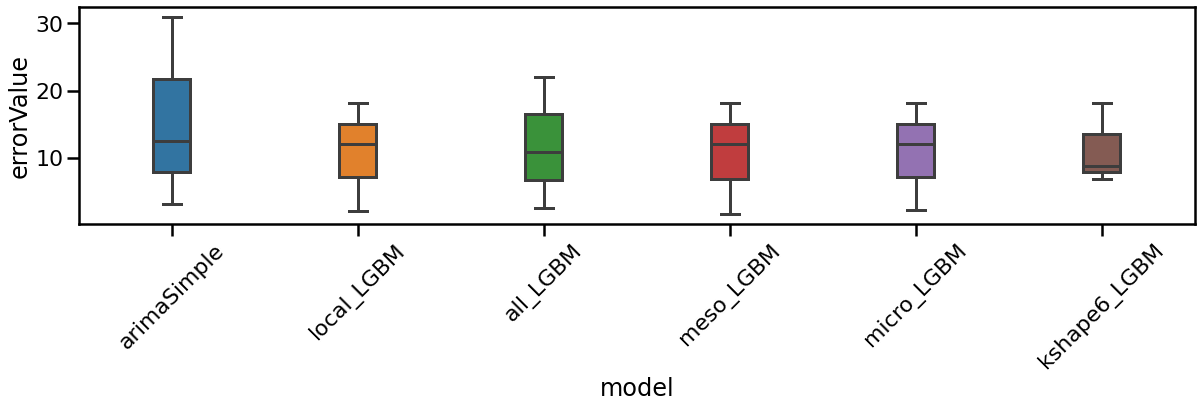

In [24]:
dfnmse = df[df['errorMetric']=='nmse']

fig, ax = plt.subplots(figsize=(20,4))
sns.boxplot(ax=ax, x=dfnmse["model"], y=dfnmse["errorValue"],  width=0.2 ,  showfliers = False)
#sns.boxenplot(ax=ax, x=dfnmse["model"], y=dfnmse["errorValue"] )
#ax.set_yscale('log')
ax.tick_params(axis='x', labelrotation=45)


In [25]:
capitais_brasil = ["rio-branco", "maceio", "macapa", "manaus", "salvador", "fortaleza", "brasilia", "vitoria", "goiania", "sao-luis", "cuiaba", "campo-grande", "belo-horizonte", "belem", "joão-pessoa", "curitiba", "recife", "teresina", "rio-de-janeiro", "natal", "porto-alegre", "porto-velho", "boa-vista", "florianopolis", "sao-paulo", "aracaju", "palmas"]


In [26]:
capitais_df = df[df['city'].isin(capitais_brasil)]

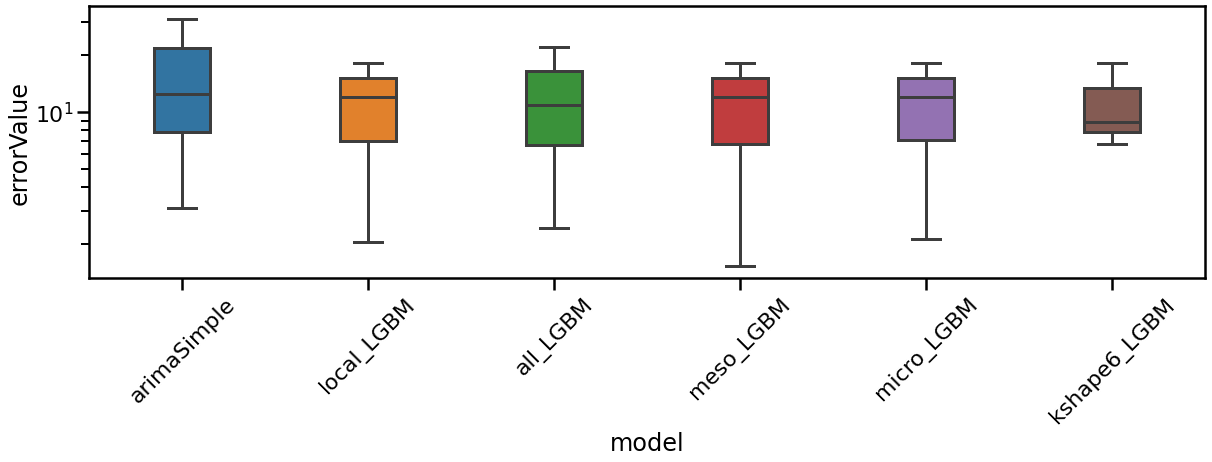

In [27]:
dfnmse = capitais_df[capitais_df['errorMetric']=='nmse']

fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(ax=ax, x=dfnmse["model"], y=dfnmse["errorValue"],  width=0.3 )
#sns.violinplot(ax=ax, x=dfnmse["model"], y=dfnmse["errorValue"] )
ax.set_yscale('log')
ax.tick_params(axis='x', labelrotation=45)